In [48]:
import Bio
from Bio.SeqUtils import Seq
import matplotlib.pyplot as plt
import numpy as np

Theory Bases : 

global alignment and local alignment are two types of sequence alignment. Global alignment finds the best possible alignment between two sequences, regardless of their lengths. Local alignment finds the best possible alignment between two sequences, but only within a specified region of each sequence.

Global alignment is typically used when the sequences to be aligned are of similar lengths. This is because global alignment algorithms try to find the best possible alignment between the two sequences, even if it means introducing gaps into one or both sequences. Gaps are inserted into sequences to account for differences in the sequences. For example, if one sequence has 10 bases and the other sequence has 12 bases, a global alignment algorithm might insert two gaps into the shorter sequence to create an alignment of 12 bases.

Local alignment is typically used when the sequences to be aligned are of different lengths. This is because local alignment algorithms only try to find the best possible alignment between the two sequences within a specified region of each sequence. This can be useful for finding regions of similarity between two sequences that are not of similar lengths.

In [2]:
MAIN_SEQ = Seq('CGATCGTGTATA')
SECOND_SEQ = Seq('ATCGT')
THIRD_SEQ = Seq('CGGTAGCTGATC')

In [18]:
# Alignment
# pairwise2

from Bio import pairwise2
from Bio.pairwise2 import format_alignment

In [21]:
# Global Alignment
global_align = pairwise2.align.globalxx(MAIN_SEQ, SECOND_SEQ)
print(f'Global Alignment : {global_align}')

for temp in global_align:
    # print(f'Temp : {temp}')
    formatted_alignment = format_alignment(*temp)
    print(formatted_alignment)

Global Alignment : [Alignment(seqA='CGATCGTGTATA', seqB='--ATC--G--T-', score=5.0, start=0, end=12), Alignment(seqA='CGATCGTGTATA', seqB='--ATCG----T-', score=5.0, start=0, end=12), Alignment(seqA='CGATCGTGTATA', seqB='--ATC--GT---', score=5.0, start=0, end=12), Alignment(seqA='CGATCGTGTATA', seqB='--ATCG--T---', score=5.0, start=0, end=12), Alignment(seqA='CGATCGTGTATA', seqB='--ATCGT-----', score=5.0, start=0, end=12)]
CGATCGTGTATA
  |||  |  | 
--ATC--G--T-
  Score=5

CGATCGTGTATA
  ||||    | 
--ATCG----T-
  Score=5

CGATCGTGTATA
  |||  ||   
--ATC--GT---
  Score=5

CGATCGTGTATA
  ||||  |   
--ATCG--T---
  Score=5

CGATCGTGTATA
  |||||     
--ATCGT-----
  Score=5



In [20]:
# Local allignment
local_allignment = pairwise2.align.localxx(MAIN_SEQ, SECOND_SEQ)
for temp in local_allignment:
  print(format_alignment(*temp))



3 ATCGTGTAT
  |||  |  |
1 ATC--G--T
  Score=5

3 ATCGTGTAT
  ||||    |
1 ATCG----T
  Score=5

3 ATCGTGT
  |||  ||
1 ATC--GT
  Score=5

3 ATCGTGT
  ||||  |
1 ATCG--T
  Score=5

3 ATCGT
  |||||
1 ATCGT
  Score=5



In [28]:
# Simalirity using alignment

global_score = pairwise2.align.globalxx(MAIN_SEQ, THIRD_SEQ, one_alignment_only = True, score_only = True)
print(f'Global Score : {global_score}')

similarity = global_score / len(MAIN_SEQ) * 100
print(f'Third Sequence - Main Sequence [Similiarity] :  {similarity}')

Global Score : 8.0
Third Sequence - Main Sequence [Similiarity] :  66.66666666666666


In [38]:
# Example Global Alignment Cases : 
# Find out all the possible global alignments with the maximum similarity score
# Maching characters : 2 points
# Each mismatching character: -1 point
# 0.5 points are deducted when opening a gap
# 0.1 points are deducted when extending it

allignments = pairwise2.align.globalms(MAIN_SEQ, THIRD_SEQ, 2, -1, -0.5, -0.1)
for allignment in allignments:
    print(format_alignment(*allignment))

CGATCGT-G-T-ATA-
||   || | | ||  
CG---GTAGCTGAT-C
  Score=12.8

CG--ATCG-TGTATA-
||  |  | || ||  
CGGTA--GCTG-AT-C
  Score=12.8

CGATCGT-G-T-ATA
||   || | | ||.
CG---GTAGCTGATC
  Score=12.8

CG--ATCG-TGTATA
||  |  | || ||.
CGGTA--GCTG-ATC
  Score=12.8



In [47]:
# Hamming Distance -> Effort that's needed to make first sequence and second sequence is same

def hamming_distance(input1, input2):
    res = [(x, y) for x, y in zip(input1, input2) if x != y]
    return len(res)

res = hamming_distance(MAIN_SEQ, THIRD_SEQ)
print(f'Main Sequence : {MAIN_SEQ}')
print(f'Third Sequence : {THIRD_SEQ}')
print(f'Hamming Distace [Main Sequence - Third Sequence] : {res}')

Main Sequence : CGATCGTGTATA
Third Sequence : CGGTAGCTGATC
Hamming Distace [Main Sequence - Third Sequence] : 6


In [45]:
# Levenshtein Distance

from Levenshtein import distance

print(f'Main Sequence : {MAIN_SEQ}')
print(f'Second Sequence : {SECOND_SEQ}')
print(f'Distance : {distance(MAIN_SEQ, SECOND_SEQ)}')

Main Sequence : CGATCGTGTATA
Second Sequence : ATCGT
Distance : 7


In [60]:
# Dot Plot (Short Version)

def delta(x, y):
  return 0 if x == y else 1

def make_matrix(input1, input2):
  m = len(input1)
  n = len(input2)
  output = [[delta(input1[i], input2[j]) for j in range(n)] for i in range (m)]
  return output

matrix = make_matrix(MAIN_SEQ, THIRD_SEQ)

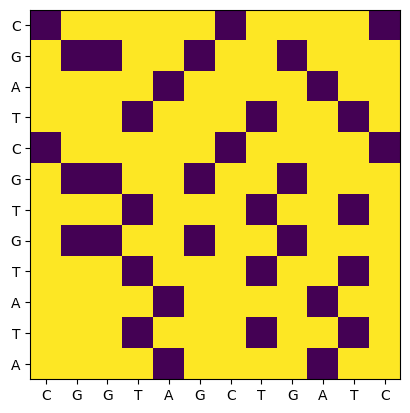

In [68]:
# Plotting the Dot Plot
plt.imshow(np.array(matrix))
plt.xticks(np.arange(len(THIRD_SEQ)), list(THIRD_SEQ))
plt.yticks(np.arange(len(MAIN_SEQ)), list(MAIN_SEQ))
plt.show()